# Setup

## Basic Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for displaying plots
import pandas as pd
import seaborn as sns
import tensorflow as tf

from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import *
from keras.callbacks import *
from keras import regularizers
from keras.utils import plot_model

from tensorflow.keras.saving import register_keras_serializable

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import datetime
import random
import properscoring as ps

from scipy.stats import norm
from scikeras.wrappers import KerasRegressor

import xgboost
import pydot
import graphviz

from keras.models import load_model
from sklearn.multioutput import MultiOutputRegressor
import pickle

from sklearn.model_selection import ParameterGrid
from pathlib import Path
import joblib

In [2]:
# setting a seed to ensure reproducability and consistency
random.seed(16)
np.random.seed(16)
tf.random.set_seed(16)

In [ ]:
plt.rcParams.update({'font.size': 13})

In [3]:
X_train = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\X_train_final.pkl")
X_valid = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\X_valid_final.pkl")
X_test = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\X_test_final.pkl")

y_train = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\y_train_final.pkl")
y_valid = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\y_valid_final.pkl")
y_test = pd.read_pickle(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\y_test_final.pkl")


In [4]:
X_train.head()

,temperature,precipitation,public_holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter,windspeed,sun,school_holiday_indicator
0,-0.039776,-0.397192,0,1,2,1.0,0.0,0.0,0.0,-0.218119,-0.031329,0
1,0.244625,-0.397192,0,1,3,1.0,0.0,0.0,0.0,-0.324284,-0.458165,0
2,0.381694,-0.371451,0,1,4,1.0,0.0,0.0,0.0,-1.076810,0.254435,0
3,1.300863,-0.397192,0,0,5,1.0,0.0,0.0,0.0,-0.405469,1.357699,0
4,0.745990,0.555250,0,0,6,1.0,0.0,0.0,0.0,0.297096,0.059103,0


In [5]:
X_valid.tail()

,temperature,precipitation,public_holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter,windspeed,sun,school_holiday_indicator
359,-1.064496,-0.397192,0,1,1,0.0,0.0,0.0,1.0,-0.258711,-0.353265,1
360,-0.478837,-0.397192,0,1,2,0.0,0.0,0.0,1.0,1.087091,-0.823509,1
361,-0.104279,0.143383,0,1,3,0.0,0.0,0.0,1.0,2.276769,-0.913940,1
362,-0.691404,0.169125,0,1,4,0.0,0.0,0.0,1.0,-0.674006,-0.508807,1
363,0.541485,-0.397192,0,0,5,0.0,0.0,0.0,1.0,1.564836,-0.201340,1


In [6]:
y_test.head()

0    1160.0
1    2996.0
2    3635.0
3    3265.0
4    3751.0
Name: bike_count, dtype: float64

In [7]:
X_train.shape, X_valid.shape, X_test.shape

((3161, 12), (364, 12), (390, 12))

In [8]:
y_train.shape, y_valid.shape, y_test.shape

((3161,), (364,), (390,))

In [9]:
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [10]:
y_train.shape, y_valid.shape, y_test.shape

((3161,), (364,), (390,))

In [11]:
X_train.isna().sum()

temperature                 0
precipitation               0
public_holiday_indicator    0
is_workday                  0
day_of_week                 0
spring                      0
summer                      0
autumn                      0
winter                      0
windspeed                   0
sun                         0
school_holiday_indicator    0
dtype: int64

In [12]:
X_train.dtypes

temperature                 float64
precipitation               float64
public_holiday_indicator      int64
is_workday                    int64
day_of_week                   int64
spring                      float64
summer                      float64
autumn                      float64
winter                      float64
windspeed                   float64
sun                         float64
school_holiday_indicator      int64
dtype: object

In [13]:
X_train.describe()

,temperature,precipitation,public_holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter,windspeed,sun,school_holiday_indicator
count,3.161000e+03,3.161000e+03,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3.161000e+03,3.161000e+03,3161.000000
mean,4.450726e-16,3.708939e-17,0.033534,0.684910,3.001898,0.243277,0.259412,0.259095,0.238216,4.832859e-17,4.720467e-17,0.232521
std,1.000158e+00,1.000158e+00,0.180054,0.464625,2.001106,0.429129,0.438381,0.438207,0.426059,1.000158e+00,1.000158e+00,0.422506
min,-2.660948e+00,-3.971923e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.513961e+00,-1.094803e+00,0.000000
25%,-7.932892e-01,-3.971923e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.364558e-01,-9.899026e-01,0.000000
50%,-9.270793e-04,-3.971923e-01,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-2.056287e-01,-2.085744e-01,0.000000
75%,7.907021e-01,-1.140338e-01,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,0.000000,4.969366e-01,8.585175e-01,0.000000
max,2.566737e+00,1.461021e+01,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,4.952762e+00,2.193287e+00,1.000000


## Functions

In [14]:
def add_column(X_train_num, X_valid_num, X_test_num, X_train, X_valid, X_test, col_name):
    
    X_train_num[col_name] = X_train[col_name]
    X_valid_num[col_name] = X_valid[col_name]
    X_test_num[col_name] = X_test[col_name]
    
    return X_train_num, X_valid_num, X_test_num

In [15]:
def crps_normal_cost_function(y_true, y_pred, tensor=True):
    """Compute the CRPS cost function for a normal distribution defined by
    the mean and standard deviation.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
    # get rid of axis 1
    if tensor:
        y_true = y_true[:, 0]
    
    # Split input
    mu = y_pred[:, 0]
    var = tf.square(y_pred[:, 1]) # Ensure standard deviation is positive
    sigma = tf.sqrt(var)  
    #sigma = y_pred[:, 1]

    # The following three variables are just for convenience
    loc = (y_true - mu) / sigma
    phi = 1.0 / tf.sqrt(2.0 * np.pi) * tf.exp(-tf.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / tf.sqrt(2.0)))
    # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / tf.sqrt(np.pi))
    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps) if tensor else crps

In [16]:
def crps_normal_cost_function_v2(y_true, y_pred, tensor=True):
    """Compute the CRPS cost function for a normal distribution defined by
    the mean and standard deviation.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
    # get rid of axis 1
    if tensor:
        y_true = y_true[:, 0]

    # Split input
    mu = y_pred[:, 0]
    sigma = tf.math.softplus(y_pred[:, 1])  # Apply softplus to ensure positive std
    #sigma = y_pred[:, 1]

    # The following three variables are just for convenience
    loc = (y_true - mu) / sigma
    phi = 1.0 / tf.sqrt(2.0 * np.pi) * tf.exp(-tf.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / tf.sqrt(2.0)))
    # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / tf.sqrt(np.pi))
    
    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps) if tensor else crps

In [17]:
def predict_and_calculate_mean_crps(model, X_test = X_test, y_test = y_test, print_predicted_mean_std = False):
    """Make predictions on test data and calculate mean CRPS.

    Args:
        model: Trained model
        X_test: Test data
        y_test: True values
        print_predicted_mean_std: Boolean to print predicted mean and std

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
     
    predicted_mean_std = model.predict(X_test)
    if print_predicted_mean_std:
        print(predicted_mean_std)
    
    predicted_mean = predicted_mean_std[:, 0]
    predicted_std = predicted_mean_std[:, 1]
    mean_crps = np.mean(ps.crps_gaussian(y_test, mu=predicted_mean, sig=predicted_std))
    print(f"\nMean CRPS: { mean_crps }")


    return mean_crps, predicted_mean_std

In [18]:
def compile_and_fit_model(model, X_train = X_train, y_train = y_train, X_valid = X_valid, y_valid = y_valid,  pat=5, lr=1e-3, loss_function = crps_normal_cost_function, epochs = 100, batch_size = 10):
    """Compile and fit a model on training data.

    Args:
        model: model to be trained
        X_train: Training data
        y_train: Training targets
        X_valid: Validation data
        y_valid: Validation targets
        pat: Patience for early stopping
        lr: Learning rate
        loss_function: Loss function
        epochs: Number of epochs
        batch_size: Batch size

    Returns:
        model: Trained model
    """

    #print some information about the model
    print('Model information:\n\nCallbacks: EarlyStopping (patience: ' + str(pat) + '), Learning Rate (Reduce on Plateau, patience: ' + str(pat) + ')\nBatch size: ' + str(batch_size) + '\nEpochs: ' + str(epochs) + '\n')
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=pat, 
                                                      restore_best_weights=True)
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.2,
                                                     patience = pat,
                                                     min_lr=0 )
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=loss_function)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stopping, reduce_lr])

    return model, history

In [19]:
def plot_loss(history):
    """Plot training and validation loss.

    Args:
        history: History object
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [20]:
def process_model(model, X_train = X_train, y_train = y_train, X_valid = X_valid, y_valid = y_valid,  X_test = X_test, y_test = y_test, pat=5, lr=1e-3, loss_function = crps_normal_cost_function, epochs = 100, batch_size = 10, print_predicted_mean_std = False, plot_loss_flag = True):
    """Compile, fit and evaluate a model.

    Args:
        model: model to be trained
        X_train: Training data
        y_train: Training targets
        X_valid: Validation data
        y_valid: Validation targets
        X_test: Test data
        y_test: Test targets
        pat: Patience for early stopping
        lr: Learning rate
        loss_function: Loss function
        epochs: Number of epochs
        batch_size: Batch size
        print_predicted_mean_std: Boolean to print predicted mean and std
"""

    model, history = compile_and_fit_model(model, X_train, y_train, X_valid, y_valid,  pat, lr, loss_function, epochs, batch_size)

    mean_crps, predicted_mean_std = predict_and_calculate_mean_crps(model, X_test, y_test, print_predicted_mean_std)

    if plot_loss_flag:
        plot_loss(history)

    return model, mean_crps, history, predicted_mean_std

In [21]:
X_train.head()

,temperature,precipitation,public_holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter,windspeed,sun,school_holiday_indicator
0,-0.039776,-0.397192,0,1,2,1.0,0.0,0.0,0.0,-0.218119,-0.031329,0
1,0.244625,-0.397192,0,1,3,1.0,0.0,0.0,0.0,-0.324284,-0.458165,0
2,0.381694,-0.371451,0,1,4,1.0,0.0,0.0,0.0,-1.076810,0.254435,0
3,1.300863,-0.397192,0,0,5,1.0,0.0,0.0,0.0,-0.405469,1.357699,0
4,0.745990,0.555250,0,0,6,1.0,0.0,0.0,0.0,0.297096,0.059103,0


# Hyperparameter Tuning

In [22]:
@register_keras_serializable(package="Custom", name="crps_normal_cost_function")
def crps_normal_cost_function_v3(y_true, y_pred, tensor=True):
    """Compute the CRPS cost function for a normal distribution defined by
    the mean and standard deviation.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
    #print("y_true shape2: ", y_true.shape)
    # Split input
    mu = y_pred[:, 0]
    sigma = tf.math.softplus(y_pred[:, 1])  # Apply softplus to ensure positive std
    #sigma = y_pred[:, 1]
    
    # The following three variables are just for convenience
    loc = (y_true - mu) / sigma
    phi = 1.0 / tf.sqrt(2.0 * np.pi) * tf.exp(-tf.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / tf.sqrt(2.0)))
    
     # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / tf.sqrt(np.pi))   
    
    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps) if tensor else crps


In [23]:
@register_keras_serializable(package="Custom", name="crps_loss_function_wrapper")  
def crps_loss_function_wrapper(y_true, y_pred, tensor=True):
    """Wrapper for CRPS loss function.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch
    """
    
    if isinstance(y_pred, (pd.DataFrame, pd.Series)):
       y_pred = tf.convert_to_tensor(y_pred.values)

    if isinstance(y_true, (pd.DataFrame, pd.Series)):
        y_true = tf.convert_to_tensor(y_true.values, dtype=tf.float32)
        
    y_pred_reshaped = y_pred.reshape(-1, 2) #Keras Regressor flattens the values so they need to be reshaped

    crps = crps_normal_cost_function_v3(y_true, y_pred_reshaped, tensor)

    crps = crps.numpy()
    
    return crps

In [24]:
def tune_nn(input_shape_in, X_train_in, X_valid_in, X_test_in, y_train_in, y_valid_in, y_test_in, model_in=None, n_neurons=[128, 256], dropout_rate=[0, 0.25, 0.5], 
            reg_values=[0, 0.01], batch_size=[32], learning_rate=[1e-3, 1e-4], n_blocks=[1,2,4], epochs = 200, cv=5, n_jobs=1, verbose=10, patience=5):
    """Tune hyperparameters of a neural network using GridSearchCV.

    Args:
        input_shape_in: Number of features
        X_train_in: Training data
        X_valid_in: Validation data
        X_test_in: Test data
        y_train_in: Training targets
        y_valid_in: Validation targets
        y_test_in: Test targets
        model_in: Predefined model
        n_neurons: Number of neurons in hidden layers
        dropout_rate: Dropout rate
        reg_values: Regularization values
        batch_size: Batch size
        learning_rate: Learning rate
        n_blocks: Number of blocks
        epochs: Number of epochs
        cv: Number of cross-validation folds
        n_jobs: Number of jobs
        verbose: Verbosity
        patience: Patience for early stopping


    Returns:
        y_pred: Predictions on test data
        best_model: Best model
        cv_results: Results of cross-validation
    """


    iteration = 0

    # Define Keras model with hyperparameters
    def create_model(n_neurons, dropout_rate, reg_value, n_blocks, learning_rate):
        nonlocal iteration  # Declare iteration as nonlocal
        model = model_in
        input_shape = input_shape_in
        if model is None:
            model = Sequential()
            model.add(Input(shape=(input_shape,)))

            for i in range(n_blocks):
                model.add(Dense(n_neurons, activation='relu', kernel_regularizer=regularizers.l2(reg_value)))
                model.add(Dropout(dropout_rate))
            
            # Output layer with two outputs: mean and std
            model.add(Dense(2, activation='softplus'))
        
        if iteration % cv == 1 or iteration == 0: # don't print for every fold
            model.summary()
        
        iteration += 1
        # only to see that something is happening
        print("Iteration: " + str(iteration))

        
        model.compile(optimizer=tf.keras.optimizers.Adam(), loss=crps_normal_cost_function_v3 )
        return model

    # Define hyperparameters
    param_grid = dict(
       batch_size=batch_size,
       optimizer__learning_rate=learning_rate,
        model__n_neurons=n_neurons,
        model__dropout_rate=dropout_rate,
        model__reg_value=reg_values,
        model__n_blocks=n_blocks
    ) 


    # Create the model
    model = KerasRegressor(model=create_model, epochs=epochs, verbose=0, batch_size=batch_size, learning_rate=learning_rate)
    

    my_scorer = make_scorer(crps_loss_function_wrapper, greater_is_better=False) 

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=my_scorer)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    
    grid_search.fit(X_train_in, y_train_in, validation_data=(X_valid_in, y_valid_in), callbacks=[early_stopping])

    # Access the best hyperparameters and results
    best_params = grid_search.best_params_
    cv_results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print("Best Hyperparameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

    y_pred = best_model.model_.predict(X_test_in)
    predicted_mean = y_pred[:, 0]
    predicted_std = y_pred[:, 1]

    mean_crps = np.mean(ps.crps_gaussian(y_test_in, mu=predicted_mean, sig=predicted_std))
    print(f"\nMean CRPS: { mean_crps }")
    
    return  y_pred, best_model, cv_results, grid_search
    

In [25]:
y_pred_tuned, best_model_tuned, cv_results_tuned, grid_search_tuned = tune_nn(X_train.shape[1], X_train, X_valid, X_test, y_train, y_valid, y_test, cv=3 )

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3; 1/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 1
[CV 1/3; 1/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-533.904 total time=  48.1s
[CV 2/3; 1/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 2
[CV 2/3; 1/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-489.293 total time= 1.2min
[CV 3/3; 1/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 3
[CV 3/3; 1/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-560.235 total time= 1.2min
[CV 1/3; 2/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 4
[CV 1/3; 2/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-531.345 total time= 1.2min
[CV 2/3; 2/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, mo

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 5
[CV 2/3; 2/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-488.241 total time= 1.2min
[CV 3/3; 2/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 6
[CV 3/3; 2/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-562.934 total time= 1.2min
[CV 1/3; 3/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 7
[CV 1/3; 3/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-535.971 total time= 1.2min
[CV 2/3; 3/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 8
[CV 2/3; 3/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-492.571 total time= 1.1min
[CV 3/3; 3/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 9
[CV 3/3; 3/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-566.181 total time= 1.2min
[CV 1/3; 4/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 10
[CV 1/3; 4/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-536.268 total time= 1.2min
[CV 2/3; 4/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 11
[CV 2/3; 4/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-495.595 total time= 1.2min
[CV 3/3; 4/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 12
[CV 3/3; 4/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-565.904 total time= 1.2min
[CV 1/3; 5/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 13
[CV 1/3; 5/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-530.577 total time= 1.2min
[CV 2/3; 5/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_ne

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 14
[CV 2/3; 5/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-478.108 total time= 1.2min
[CV 3/3; 5/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 15
[CV 3/3; 5/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-554.651 total time= 1.2min
[CV 1/3; 6/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 16
[CV 1/3; 6/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-531.384 total time= 1.2min
[CV 2/3; 6/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256,

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 17
[CV 2/3; 6/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-478.412 total time= 1.1min
[CV 3/3; 6/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 18
[CV 3/3; 6/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-556.478 total time= 1.1min
[CV 1/3; 7/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 19
[CV 1/3; 7/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-533.157 total time= 1.1min
[CV 2/3; 7/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neuro

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 20
[CV 2/3; 7/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-488.996 total time= 1.1min
[CV 3/3; 7/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 21
[CV 3/3; 7/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-561.504 total time= 1.1min
[CV 1/3; 8/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 22
[CV 1/3; 8/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-535.165 total time= 1.1min
[CV 2/3; 8/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model_

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 23
[CV 2/3; 8/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-488.975 total time= 1.1min
[CV 3/3; 8/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 24
[CV 3/3; 8/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-560.001 total time= 1.1min
[CV 1/3; 9/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 25
[CV 1/3; 9/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-436.267 total time= 1.2min
[CV 2/3; 9/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_ne

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 26
[CV 2/3; 9/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-372.260 total time= 1.2min
[CV 3/3; 9/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 27
[CV 3/3; 9/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-456.862 total time= 1.2min
[CV 1/3; 10/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 28
[CV 1/3; 10/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-450.280 total time= 1.2min
[CV 2/3; 10/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=1

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 29
[CV 2/3; 10/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-375.688 total time= 1.2min
[CV 3/3; 10/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 30
[CV 3/3; 10/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-454.170 total time= 1.2min
[CV 1/3; 11/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 31
[CV 1/3; 11/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-457.599 total time= 1.2min
[CV 2/3; 11/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 32
[CV 2/3; 11/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-432.693 total time= 1.2min
[CV 3/3; 11/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 33
[CV 3/3; 11/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-472.136 total time= 1.2min
[CV 1/3; 12/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 34
[CV 1/3; 12/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-447.056 total time= 1.2min
[CV 2/3; 12/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, 

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 35
[CV 2/3; 12/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-384.649 total time= 1.3min
[CV 3/3; 12/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 36
[CV 3/3; 12/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-494.808 total time= 1.3min
[CV 1/3; 13/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 37
[CV 1/3; 13/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-427.641 total time= 1.5min
[CV 2/3; 13/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 38
[CV 2/3; 13/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-360.193 total time= 1.4min
[CV 3/3; 13/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 39
[CV 3/3; 13/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-437.675 total time= 1.4min
[CV 1/3; 14/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 40
[CV 1/3; 14/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-421.066 total time= 1.4min
[CV 2/3; 14/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neuron

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 41
[CV 2/3; 14/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-352.829 total time= 1.4min
[CV 3/3; 14/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 42
[CV 3/3; 14/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-440.569 total time= 1.3min
[CV 1/3; 15/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 43
[CV 1/3; 15/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-431.078 total time= 1.4min
[CV 2/3; 15/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 44
[CV 2/3; 15/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-370.769 total time= 1.4min
[CV 3/3; 15/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 45
[CV 3/3; 15/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-449.052 total time= 1.4min
[CV 1/3; 16/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 46
[CV 1/3; 16/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-435.492 total time= 1.4min
[CV 2/3; 16/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, 

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 47
[CV 2/3; 16/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-369.324 total time= 1.4min
[CV 3/3; 16/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 48
[CV 3/3; 16/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-451.536 total time= 1.5min
[CV 1/3; 17/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 49
[CV 1/3; 17/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-445.256 total time= 1.5min
[CV 2/3; 17/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_125 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 50
[CV 2/3; 17/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-355.299 total time= 1.4min
[CV 3/3; 17/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 51
[CV 3/3; 17/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-511.796 total time=  43.1s
[CV 1/3; 18/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 52
[CV 1/3; 18/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-418.724 total time=  42.6s
[CV 2/3; 18/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neuron

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 53
[CV 2/3; 18/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-346.703 total time=  43.4s
[CV 3/3; 18/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 54
[CV 3/3; 18/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-544.279 total time=  43.6s
[CV 1/3; 19/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 55
[CV 1/3; 19/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-416.458 total time=  44.1s
[CV 2/3; 19/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_155 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 56
[CV 2/3; 19/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-350.489 total time=  44.1s
[CV 3/3; 19/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 57
[CV 3/3; 19/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-500.993 total time=  46.2s
[CV 1/3; 20/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 58
[CV 1/3; 20/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-451.387 total time=  47.0s
[CV 2/3; 20/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, 

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_170 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 59
[CV 2/3; 20/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-348.037 total time= 1.4min
[CV 3/3; 20/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 60
[CV 3/3; 20/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-498.886 total time= 1.5min
[CV 1/3; 21/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 61
[CV 1/3; 21/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-529.854 total time= 1.6min
[CV 2/3; 21/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_126 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_127 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 62
[CV 2/3; 21/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-364.244 total time= 1.5min
[CV 3/3; 21/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 63
[CV 3/3; 21/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-563.342 total time= 1.6min
[CV 1/3; 22/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 64
[CV 1/3; 22/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-498.305 total time= 1.7min
[CV 2/3; 22/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neuron

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_200 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_137 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_139 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 65
[CV 2/3; 22/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-375.639 total time= 1.7min
[CV 3/3; 22/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 66
[CV 3/3; 22/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-560.418 total time= 1.6min
[CV 1/3; 23/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 67
[CV 1/3; 23/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-472.962 total time= 1.6min
[CV 2/3; 23/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_215 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_148 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_149 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 68
[CV 2/3; 23/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-367.753 total time= 1.6min
[CV 3/3; 23/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 69
[CV 3/3; 23/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-520.957 total time= 1.7min
[CV 1/3; 24/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 70
[CV 1/3; 24/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-476.049 total time= 1.7min
[CV 2/3; 24/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, 

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_230 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_160 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_161 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_162 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 71
[CV 2/3; 24/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-365.693 total time= 1.7min
[CV 3/3; 24/72] START batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 72
[CV 3/3; 24/72] END batch_size=32, model__dropout_rate=0, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-533.493 total time= 1.6min
[CV 1/3; 25/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 73
[CV 1/3; 25/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-527.361 total time= 1.3min
[CV 2/3; 25/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks

Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_242 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_169 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 74
[CV 2/3; 25/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-489.946 total time= 1.3min
[CV 3/3; 25/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 75
[CV 3/3; 25/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-560.177 total time= 1.2min
[CV 1/3; 26/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 76
[CV 1/3; 26/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-529.320 total time= 1.3min
[CV 2/3; 26/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_248 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_172 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 77
[CV 2/3; 26/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-489.432 total time= 1.2min
[CV 3/3; 26/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 78
[CV 3/3; 26/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-562.363 total time= 1.3min
[CV 1/3; 27/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 79
[CV 1/3; 27/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-534.416 total time= 1.2min
[CV 2/3; 27/72] START batch_size=32, model__dropout_rate=0.25, model__n_

Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_254 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_175 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 80
[CV 2/3; 27/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-503.688 total time= 1.3min
[CV 3/3; 27/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 81
[CV 3/3; 27/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-569.522 total time= 1.3min
[CV 1/3; 28/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 82
[CV 1/3; 28/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-532.024 total time= 1.3min
[CV 2/3; 28/72] START batch_size=32, model__dropout_rate=0.25, m

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_260 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_178 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 83
[CV 2/3; 28/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-505.301 total time= 1.2min
[CV 3/3; 28/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 84
[CV 3/3; 28/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-572.194 total time= 1.2min
[CV 1/3; 29/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 85
[CV 1/3; 29/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-527.364 total time= 1.1min
[CV 2/3; 29/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_266 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_181 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_267 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 86
[CV 2/3; 29/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-484.172 total time= 1.3min
[CV 3/3; 29/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 87
[CV 3/3; 29/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-557.641 total time= 1.3min
[CV 1/3; 30/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 88
[CV 1/3; 30/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-525.280 total time= 1.4min
[CV 2/3; 30/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_272 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_184 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_273 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 89
[CV 2/3; 30/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-482.167 total time= 1.3min
[CV 3/3; 30/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 90
[CV 3/3; 30/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-554.752 total time= 1.4min
[CV 1/3; 31/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 91
[CV 1/3; 31/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-532.724 total time= 1.4min
[CV 2/3; 31/72] START batch_size=32, model__dropout_rate=0.25, model__n_

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_278 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_187 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 92
[CV 2/3; 31/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-490.697 total time= 1.4min
[CV 3/3; 31/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 93
[CV 3/3; 31/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-565.649 total time= 1.3min
[CV 1/3; 32/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 94
[CV 1/3; 32/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-532.938 total time= 1.3min
[CV 2/3; 32/72] START batch_size=32, model__dropout_rate=0.25, m

Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_284 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_190 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_285 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 95
[CV 2/3; 32/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-490.417 total time= 1.4min
[CV 3/3; 32/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 96
[CV 3/3; 32/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-560.225 total time= 1.4min
[CV 1/3; 33/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 97
[CV 1/3; 33/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-436.415 total time= 1.4min
[CV 2/3; 33/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_291 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_194 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_292 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_195 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_293 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 98
[CV 2/3; 33/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-377.512 total time= 1.4min
[CV 3/3; 33/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 99
[CV 3/3; 33/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-454.039 total time= 1.4min
[CV 1/3; 34/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 100
[CV 1/3; 34/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-435.272 total time= 1.4min
[CV 2/3; 34/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_300 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_301 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_201 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_302 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 101
[CV 2/3; 34/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-375.394 total time= 1.4min
[CV 3/3; 34/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 102
[CV 3/3; 34/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-457.536 total time= 1.0min
[CV 1/3; 35/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 103
[CV 1/3; 35/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-474.836 total time= 1.4min
[CV 2/3; 35/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_309 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_206 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_310 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_207 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_311 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 104
[CV 2/3; 35/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-385.933 total time= 1.4min
[CV 3/3; 35/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 105
[CV 3/3; 35/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-460.260 total time= 1.4min
[CV 1/3; 36/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 106
[CV 1/3; 36/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-445.394 total time= 1.4min
[CV 2/3; 36/72] START batch_size=32, model__dropout_rate=0.25

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_318 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_212 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_213 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 107
[CV 2/3; 36/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-398.243 total time=  56.8s
[CV 3/3; 36/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 108
[CV 3/3; 36/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-462.229 total time=  50.6s
[CV 1/3; 37/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 109
[CV 1/3; 37/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-412.499 total time=  55.5s
[CV 2/3; 37/72] START batch_size=32, model__dropout_rate=0.25, mod

Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_327 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_218 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_328 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_219 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_329 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 110
[CV 2/3; 37/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-367.511 total time=  56.2s
[CV 3/3; 37/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 111
[CV 3/3; 37/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-455.542 total time=  56.3s
[CV 1/3; 38/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 112
[CV 1/3; 38/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-424.822 total time= 1.0min
[CV 2/3; 38/72] START batch_size=32, model__dropout_rate=0.25, model__n_bloc

Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_336 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_224 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_337 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_225 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_338 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 113
[CV 2/3; 38/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-372.331 total time= 1.0min
[CV 3/3; 38/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 114
[CV 3/3; 38/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-458.675 total time=  59.3s
[CV 1/3; 39/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 115
[CV 1/3; 39/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-434.651 total time=  59.3s
[CV 2/3; 39/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_345 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_230 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_346 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_231 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_347 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 116
[CV 2/3; 39/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-376.997 total time=  58.2s
[CV 3/3; 39/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 117
[CV 3/3; 39/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-467.146 total time=  58.9s
[CV 1/3; 40/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 118
[CV 1/3; 40/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-425.189 total time=  59.8s
[CV 2/3; 40/72] START batch_size=32, model__dropout_rate=0.25

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_354 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_236 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_355 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_237 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_356 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 119
[CV 2/3; 40/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-376.106 total time=  59.3s
[CV 3/3; 40/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 120
[CV 3/3; 40/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-465.964 total time=  59.2s
[CV 1/3; 41/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 121
[CV 1/3; 41/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-404.553 total time=  58.4s
[CV 2/3; 41/72] START batch_size=32, model__dropout_rate=0.25, mod

Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_365 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_244 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_366 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_245 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_367 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_246 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_368 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_247 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_369 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 122
[CV 2/3; 41/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-374.344 total time=  58.1s
[CV 3/3; 41/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 123
[CV 3/3; 41/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-417.747 total time=  57.4s
[CV 1/3; 42/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 124
[CV 1/3; 42/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-418.435 total time=  56.9s
[CV 2/3; 42/72] START batch_size=32, model__dropout_rate=0.25, model__n_bloc

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_380 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_256 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_381 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_257 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_382 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_258 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_383 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_259 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_384 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 125
[CV 2/3; 42/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-375.771 total time=  57.5s
[CV 3/3; 42/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 126
[CV 3/3; 42/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-468.188 total time=  57.0s
[CV 1/3; 43/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 127
[CV 1/3; 43/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-399.105 total time=  57.1s
[CV 2/3; 43/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_395 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_268 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_396 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_269 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_397 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_270 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_398 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_271 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_399 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 128
[CV 2/3; 43/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-382.442 total time=  56.5s
[CV 3/3; 43/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 129
[CV 3/3; 43/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-486.858 total time=  57.3s
[CV 1/3; 44/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 130
[CV 1/3; 44/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-406.248 total time=  57.0s
[CV 2/3; 44/72] START batch_size=32, model__dropout_rate=0.25

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_410 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_280 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_411 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_281 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_412 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_282 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_413 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_283 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_414 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 131
[CV 2/3; 44/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-363.619 total time= 1.0min
[CV 3/3; 44/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 132
[CV 3/3; 44/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-421.030 total time=  58.9s
[CV 1/3; 45/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 133
[CV 1/3; 45/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-408.251 total time= 1.2min
[CV 2/3; 45/72] START batch_size=32, model__dropout_rate=0.25, mod

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_425 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_292 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_426 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_293 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_427 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_294 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_428 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_295 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_429 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 134
[CV 2/3; 45/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-369.252 total time= 1.2min
[CV 3/3; 45/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 135
[CV 3/3; 45/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-472.032 total time= 1.2min
[CV 1/3; 46/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 136
[CV 1/3; 46/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-395.687 total time= 1.2min
[CV 2/3; 46/72] START batch_size=32, model__dropout_rate=0.25, model__n_bloc

Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_440 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_304 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_441 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_305 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_442 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_306 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_443 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_307 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_444 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 137
[CV 2/3; 46/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-354.154 total time= 1.2min
[CV 3/3; 46/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 138
[CV 3/3; 46/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-467.574 total time= 1.2min
[CV 1/3; 47/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 139
[CV 1/3; 47/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-389.675 total time= 1.2min
[CV 2/3; 47/72] START batch_size=32, model__dropout_rate=0.25, model_

Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_455 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_316 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_456 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_317 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_457 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_318 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_458 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_319 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_459 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 140
[CV 2/3; 47/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-354.370 total time= 1.2min
[CV 3/3; 47/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 141
[CV 3/3; 47/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-476.296 total time= 1.2min
[CV 1/3; 48/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 142
[CV 1/3; 48/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-407.615 total time= 1.2min
[CV 2/3; 48/72] START batch_size=32, model__dropout_rate=0.25

Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_470 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_328 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_471 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_329 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_472 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_330 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_473 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_331 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_474 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 143
[CV 2/3; 48/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-359.888 total time= 1.2min
[CV 3/3; 48/72] START batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 144
[CV 3/3; 48/72] END batch_size=32, model__dropout_rate=0.25, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-477.500 total time= 1.2min
[CV 1/3; 49/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 145
[CV 1/3; 49/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-528.823 total time=  46.5s
[CV 2/3; 49/72] START batch_size=32, model__dropout_rate=0.5, model_

Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_482 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_337 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_483 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 146
[CV 2/3; 49/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-502.338 total time=  45.9s
[CV 3/3; 49/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 147
[CV 3/3; 49/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-564.550 total time=  45.5s
[CV 1/3; 50/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 148
[CV 1/3; 50/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-528.193 total time=  46.9s
[CV 2/3; 50/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, 

Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_488 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_340 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_489 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 149
[CV 2/3; 50/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-502.883 total time=  45.4s
[CV 3/3; 50/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 150
[CV 3/3; 50/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-565.279 total time=  45.3s
[CV 1/3; 51/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 151
[CV 1/3; 51/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-540.283 total time=  46.1s
[CV 2/3; 51/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_494 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_343 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_495 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 152
[CV 2/3; 51/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-518.271 total time=  45.5s
[CV 3/3; 51/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 153
[CV 3/3; 51/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-581.667 total time=  45.1s
[CV 1/3; 52/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 154
[CV 1/3; 52/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-537.415 total time=  45.1s
[CV 2/3; 52/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_500 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_346 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_501 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 155
[CV 2/3; 52/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-522.044 total time=  48.0s
[CV 3/3; 52/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 156
[CV 3/3; 52/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-581.228 total time=  47.0s
[CV 1/3; 53/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 157
[CV 1/3; 53/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-525.518 total time=  47.9s
[CV 2/3; 53/72] START batch_size=32, model__dropout_rate=0.5, model__n_

Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_506 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_349 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_507 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 158
[CV 2/3; 53/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-489.512 total time=  47.4s
[CV 3/3; 53/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 159
[CV 3/3; 53/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-557.162 total time=  47.9s
[CV 1/3; 54/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 160
[CV 1/3; 54/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-524.677 total time=  48.4s
[CV 2/3; 54/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, 

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_512 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_352 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_513 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 161
[CV 2/3; 54/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-487.805 total time=  47.6s
[CV 3/3; 54/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 162
[CV 3/3; 54/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-557.136 total time=  47.1s
[CV 1/3; 55/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 163
[CV 1/3; 55/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-528.587 total time=  46.6s
[CV 2/3; 55/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_518 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_355 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_519 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 164
[CV 2/3; 55/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-500.657 total time=  46.4s
[CV 3/3; 55/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 165
[CV 3/3; 55/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-566.686 total time=  47.1s
[CV 1/3; 56/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 166
[CV 1/3; 56/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-530.004 total time=  46.9s
[CV 2/3; 56/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_524 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_358 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_525 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,842 (15.01 KB)

 Trainable params: 3,842 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 167
[CV 2/3; 56/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-499.571 total time=  47.6s
[CV 3/3; 56/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 168
[CV 3/3; 56/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=1, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-567.149 total time=  47.0s
[CV 1/3; 57/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 169
[CV 1/3; 57/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-505.778 total time=  51.0s
[CV 2/3; 57/72] START batch_size=32, model__dropout_rate=0.5, model__n_

Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_531 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_362 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_532 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_363 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_533 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 170
[CV 2/3; 57/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-494.122 total time=  50.9s
[CV 3/3; 57/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 171
[CV 3/3; 57/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-551.595 total time=  50.6s
[CV 1/3; 58/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 172
[CV 1/3; 58/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-525.868 total time=  50.7s
[CV 2/3; 58/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, 

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_540 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_368 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_541 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_369 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_542 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 173
[CV 2/3; 58/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-498.904 total time=  51.7s
[CV 3/3; 58/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 174
[CV 3/3; 58/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-552.425 total time=  50.5s
[CV 1/3; 59/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 175
[CV 1/3; 59/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-507.050 total time=  50.7s
[CV 2/3; 59/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_549 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_374 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_550 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_375 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_551 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 176
[CV 2/3; 59/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-458.737 total time=  50.9s
[CV 3/3; 59/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 177
[CV 3/3; 59/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-488.353 total time=  50.5s
[CV 1/3; 60/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 178
[CV 1/3; 60/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-494.768 total time=  50.2s
[CV 2/3; 60/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_558 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_380 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_559 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_381 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_560 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 179
[CV 2/3; 60/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-460.278 total time=  51.2s
[CV 3/3; 60/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 180
[CV 3/3; 60/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-513.653 total time=  50.7s
[CV 1/3; 61/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 181
[CV 1/3; 61/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-422.561 total time=  56.5s
[CV 2/3; 61/72] START batch_size=32, model__dropout_rate=0.5, model__n_

Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_567 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_386 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_568 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_387 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_569 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 182
[CV 2/3; 61/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-387.986 total time=  56.5s
[CV 3/3; 61/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 183
[CV 3/3; 61/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-449.037 total time=  56.6s
[CV 1/3; 62/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 184
[CV 1/3; 62/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-430.464 total time=  56.6s
[CV 2/3; 62/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, 

Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_576 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_392 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_577 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_393 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_578 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 185
[CV 2/3; 62/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-382.252 total time=  56.7s
[CV 3/3; 62/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 186
[CV 3/3; 62/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-451.810 total time=  57.8s
[CV 1/3; 63/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 187
[CV 1/3; 63/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-431.297 total time=  57.7s
[CV 2/3; 63/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_585 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_398 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_586 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_399 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_587 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 188
[CV 2/3; 63/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-395.129 total time=  57.1s
[CV 3/3; 63/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 189
[CV 3/3; 63/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-469.345 total time=  56.6s
[CV 1/3; 64/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 190
[CV 1/3; 64/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-434.481 total time=  56.9s
[CV 2/3; 64/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_594 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_404 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_595 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_405 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_596 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,634 (272.01 KB)

 Trainable params: 69,634 (272.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 191
[CV 2/3; 64/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-388.052 total time= 1.0min
[CV 3/3; 64/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 192
[CV 3/3; 64/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=2, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-464.349 total time=  59.3s
[CV 1/3; 65/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 193
[CV 1/3; 65/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-446.657 total time=  58.7s
[CV 2/3; 65/72] START batch_size=32, model__dropout_rate=0.5, model__n_

Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_605 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_412 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_606 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_413 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_607 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_414 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_608 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_415 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_609 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 194
[CV 2/3; 65/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-437.349 total time= 1.0min
[CV 3/3; 65/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 195
[CV 3/3; 65/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.001;, score=-488.170 total time=  59.2s
[CV 1/3; 66/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 196
[CV 1/3; 66/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-434.475 total time=  59.5s
[CV 2/3; 66/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, 

Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_620 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_424 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_621 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_425 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_622 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_426 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_623 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_427 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_624 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 197
[CV 2/3; 66/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-423.747 total time=  59.0s
[CV 3/3; 66/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 198
[CV 3/3; 66/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-483.556 total time=  58.5s
[CV 1/3; 67/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 199
[CV 1/3; 67/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-426.657 total time=  59.1s
[CV 2/3; 67/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_635 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_436 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_636 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_437 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_637 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_438 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_638 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_439 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_639 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 200
[CV 2/3; 67/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-478.177 total time=  58.4s
[CV 3/3; 67/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 201
[CV 3/3; 67/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-489.920 total time=  58.0s
[CV 1/3; 68/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 202
[CV 1/3; 68/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-420.221 total time=  57.8s
[CV 2/3; 68/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_650 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_448 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_651 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_449 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_652 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_450 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_653 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_451 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_654 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,458 (201.01 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 203
[CV 2/3; 68/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-526.234 total time=  58.4s
[CV 3/3; 68/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 204
[CV 3/3; 68/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=128, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-459.155 total time=  57.9s
[CV 1/3; 69/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 205
[CV 1/3; 69/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-401.039 total time= 1.2min
[CV 2/3; 69/72] START batch_size=32, model__dropout_rate=0.5, model__n_

Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_665 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_460 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_666 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_461 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_667 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_462 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_668 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_463 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_669 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 206
[CV 2/3; 69/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-387.088 total time= 1.2min
[CV 3/3; 69/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001
Iteration: 207
[CV 3/3; 69/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.001;, score=-433.890 total time= 1.2min
[CV 1/3; 70/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 208
[CV 1/3; 70/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-390.472 total time= 1.2min
[CV 2/3; 70/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, 

Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_680 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_472 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_681 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_473 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_682 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_474 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_683 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_475 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_684 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 209
[CV 2/3; 70/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-380.295 total time= 1.2min
[CV 3/3; 70/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001
Iteration: 210
[CV 3/3; 70/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0, optimizer__learning_rate=0.0001;, score=-433.129 total time= 1.2min
[CV 1/3; 71/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 211
[CV 1/3; 71/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-390.148 total time= 1.2min
[CV 2/3; 71/72] START batch_size=32, model__dropout_rate=0.5, model__n_blo

Model: "sequential_211"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_695 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_484 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_696 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_485 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_697 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_486 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_698 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_487 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_699 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 212
[CV 2/3; 71/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-373.911 total time= 1.2min
[CV 3/3; 71/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001
Iteration: 213
[CV 3/3; 71/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.001;, score=-466.595 total time= 1.2min
[CV 1/3; 72/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 214
[CV 1/3; 72/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-428.845 total time= 1.2min
[CV 2/3; 72/72] START batch_size=32, model__dropout_rate=0.5, mode

Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_710 (Dense)               │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_496 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_711 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_497 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_712 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_498 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_713 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_499 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_714 (Dense)               │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,218 (786.01 KB)

 Trainable params: 201,218 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

Iteration: 215
[CV 2/3; 72/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-424.836 total time= 1.2min
[CV 3/3; 72/72] START batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001
Iteration: 216
[CV 3/3; 72/72] END batch_size=32, model__dropout_rate=0.5, model__n_blocks=4, model__n_neurons=256, model__reg_value=0.01, optimizer__learning_rate=0.0001;, score=-479.209 total time= 1.2min
Iteration: 217
Best Hyperparameters:
batch_size: 32
model__dropout_rate: 0.25
model__n_blocks: 4
model__n_neurons: 128
model__reg_value: 0.01
optimizer__learning_rate: 0.0001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Mean CRPS: 315.84538516468314


In [26]:
best_model_tuned.model_.summary()

Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_720 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_504 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_721 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_505 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_722 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_506 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_723 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_507 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_724 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,376 (603.04 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,918 (402.03 KB)

In [27]:
y_pred_tuned

array([[1009.6645  ,  188.22534 ],
       [2985.1567  ,  488.09778 ],
       [3381.6438  ,  552.22284 ],
       [2796.2795  ,  457.4667  ],
       [3125.5134  ,  510.76703 ],
       [ 854.10913 ,  149.95091 ],
       [2681.3674  ,  438.91754 ],
       [1211.8976  ,  237.84648 ],
       [3656.4724  ,  596.5704  ],
       [4567.144   ,  743.8402  ],
       [3661.4573  ,  597.3916  ],
       [4326.945   ,  704.9624  ],
       [3550.2034  ,  579.4592  ],
       [2990.0356  ,  488.78027 ],
       [1065.5217  ,  208.6585  ],
       [3448.1155  ,  562.8904  ],
       [4600.5576  ,  749.2724  ],
       [3981.6577  ,  649.20654 ],
       [4002.195   ,  652.5144  ],
       [4171.756   ,  680.01337 ],
       [2373.2842  ,  389.1189  ],
       [1253.5846  ,  246.85146 ],
       [3790.121   ,  618.2081  ],
       [3986.1135  ,  649.8803  ],
       [4139.591   ,  674.70905 ],
       [4061.9336  ,  662.1883  ],
       [4055.0525  ,  661.1047  ],
       [2753.1836  ,  450.4903  ],
       [1381.6261  ,

In [28]:
# Define the base path using pathlib
base_path = Path(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Hyperparameter_Tuning_Ergebnisse")

In [29]:
file_name_predictions = "y_pred_tuned_v2_2.csv"
file_path_predictions = base_path / file_name_predictions

np.savetxt(str(file_path_predictions), y_pred_tuned, delimiter=',')

In [30]:
file_name_cv_results = "cv_results_tuned_v2_2.csv"
file_path_cv_results = base_path / file_name_cv_results
cv_results_tuned.to_csv(str(file_path_cv_results), index=False)


In [31]:
model_path = base_path / "best_model_tuned_v2_2.keras"
best_model_tuned.model_.save(str(model_path))

In [32]:
file_name_grid_search = "grid_search_tuned_v2_2.pkl"
file_path_grid_search = base_path / file_name_grid_search

joblib.dump(grid_search_tuned, str(file_path_grid_search))

['C:\\Users\\aisti\\OneDrive\\Dokumente\\Uni\\Bachelorarbeit\\Hyperparameter_Tuning_Ergebnisse\\grid_search_tuned_v2_2.pkl']

In [33]:
loaded_grid_search_tuned = joblib.load(str(file_path_grid_search))

In [34]:
loaded_grid_search_tuned.best_params_

{'batch_size': 32,
 'model__dropout_rate': 0.25,
 'model__n_blocks': 4,
 'model__n_neurons': 128,
 'model__reg_value': 0.01,
 'optimizer__learning_rate': 0.0001}

In [35]:
pd.DataFrame(loaded_grid_search_tuned.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_model__dropout_rate,param_model__n_blocks,param_model__n_neurons,param_model__reg_value,param_optimizer__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,62.980677,10.700564,0.299648,0.042951,32,0.0,1,128,0.00,0.0010,"{'batch_size': 32, 'model__dropout_rate': 0, '...",-533.904175,-489.293182,-560.235413,-527.810923,29.280776,58
1,71.371424,0.426610,0.300734,0.006701,32,0.0,1,128,0.00,0.0001,"{'batch_size': 32, 'model__dropout_rate': 0, '...",-531.344849,-488.240631,-562.934448,-527.506643,30.614163,57
2,68.604479,1.010777,0.297653,0.027119,32,0.0,1,128,0.01,0.0010,"{'batch_size': 32, 'model__dropout_rate': 0, '...",-535.970581,-492.570526,-566.180603,-531.573903,30.211575,63
3,70.044403,1.217547,0.442768,0.203884,32,0.0,1,128,0.01,0.0001,"{'batch_size': 32, 'model__dropout_rate': 0, '...",-536.268066,-495.594574,-565.904175,-532.588938,28.821427,68
4,69.963800,0.664591,0.347786,0.011675,32,0.0,1,256,0.00,0.0010,"{'batch_size': 32, 'model__dropout_rate': 0, '...",-530.576660,-478.107544,-554.650818,-521.111674,31.957343,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,57.907848,0.273982,0.247915,0.010245,32,0.5,4,128,0.01,0.0001,"{'batch_size': 32, 'model__dropout_rate': 0.5,...",-420.221130,-526.234314,-459.154633,-468.536692,43.785203,42
68,69.778187,0.189498,0.241994,0.012096,32,0.5,4,256,0.00,0.0010,"{'batch_size': 32, 'model__dropout_rate': 0.5,...",-401.038879,-387.087921,-433.889771,-407.338857,19.619218,7
69,69.614738,0.117918,0.264427,0.024216,32,0.5,4,256,0.00,0.0001,"{'batch_size': 32, 'model__dropout_rate': 0.5,...",-390.472412,-380.295319,-433.128510,-401.298747,22.887313,3
70,71.086917,0.546733,0.256982,0.014820,32,0.5,4,256,0.01,0.0010,"{'batch_size': 32, 'model__dropout_rate': 0.5,...",-390.147766,-373.911285,-466.595276,-410.218109,40.411999,9


In [36]:
# Load the model with custom objects
loaded_model = load_model(
    model_path,
    custom_objects={'crps_normal_cost_function_v3': crps_normal_cost_function_v3}
)

In [37]:
loaded_model.summary()

Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_720 (Dense)               │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_504 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_721 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_505 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_722 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_506 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_723 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_507 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_724 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,376 (603.04 KB)

 Trainable params: 51,458 (201.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,918 (402.03 KB)

In [38]:
mean_crps, predicted_mean_std = predict_and_calculate_mean_crps(loaded_model, X_test, y_test, print_predicted_mean_std=False)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Mean CRPS: 315.84538516468314


In [39]:
predicted_mean_std

array([[1009.6645  ,  188.22534 ],
       [2985.1567  ,  488.09778 ],
       [3381.6438  ,  552.22284 ],
       [2796.2795  ,  457.4667  ],
       [3125.5134  ,  510.76703 ],
       [ 854.10913 ,  149.95091 ],
       [2681.3674  ,  438.91754 ],
       [1211.8976  ,  237.84648 ],
       [3656.4724  ,  596.5704  ],
       [4567.144   ,  743.8402  ],
       [3661.4573  ,  597.3916  ],
       [4326.945   ,  704.9624  ],
       [3550.2034  ,  579.4592  ],
       [2990.0356  ,  488.78027 ],
       [1065.5217  ,  208.6585  ],
       [3448.1155  ,  562.8904  ],
       [4600.5576  ,  749.2724  ],
       [3981.6577  ,  649.20654 ],
       [4002.195   ,  652.5144  ],
       [4171.756   ,  680.01337 ],
       [2373.2842  ,  389.1189  ],
       [1253.5846  ,  246.85146 ],
       [3790.121   ,  618.2081  ],
       [3986.1135  ,  649.8803  ],
       [4139.591   ,  674.70905 ],
       [4061.9336  ,  662.1883  ],
       [4055.0525  ,  661.1047  ],
       [2753.1836  ,  450.4903  ],
       [1381.6261  ,

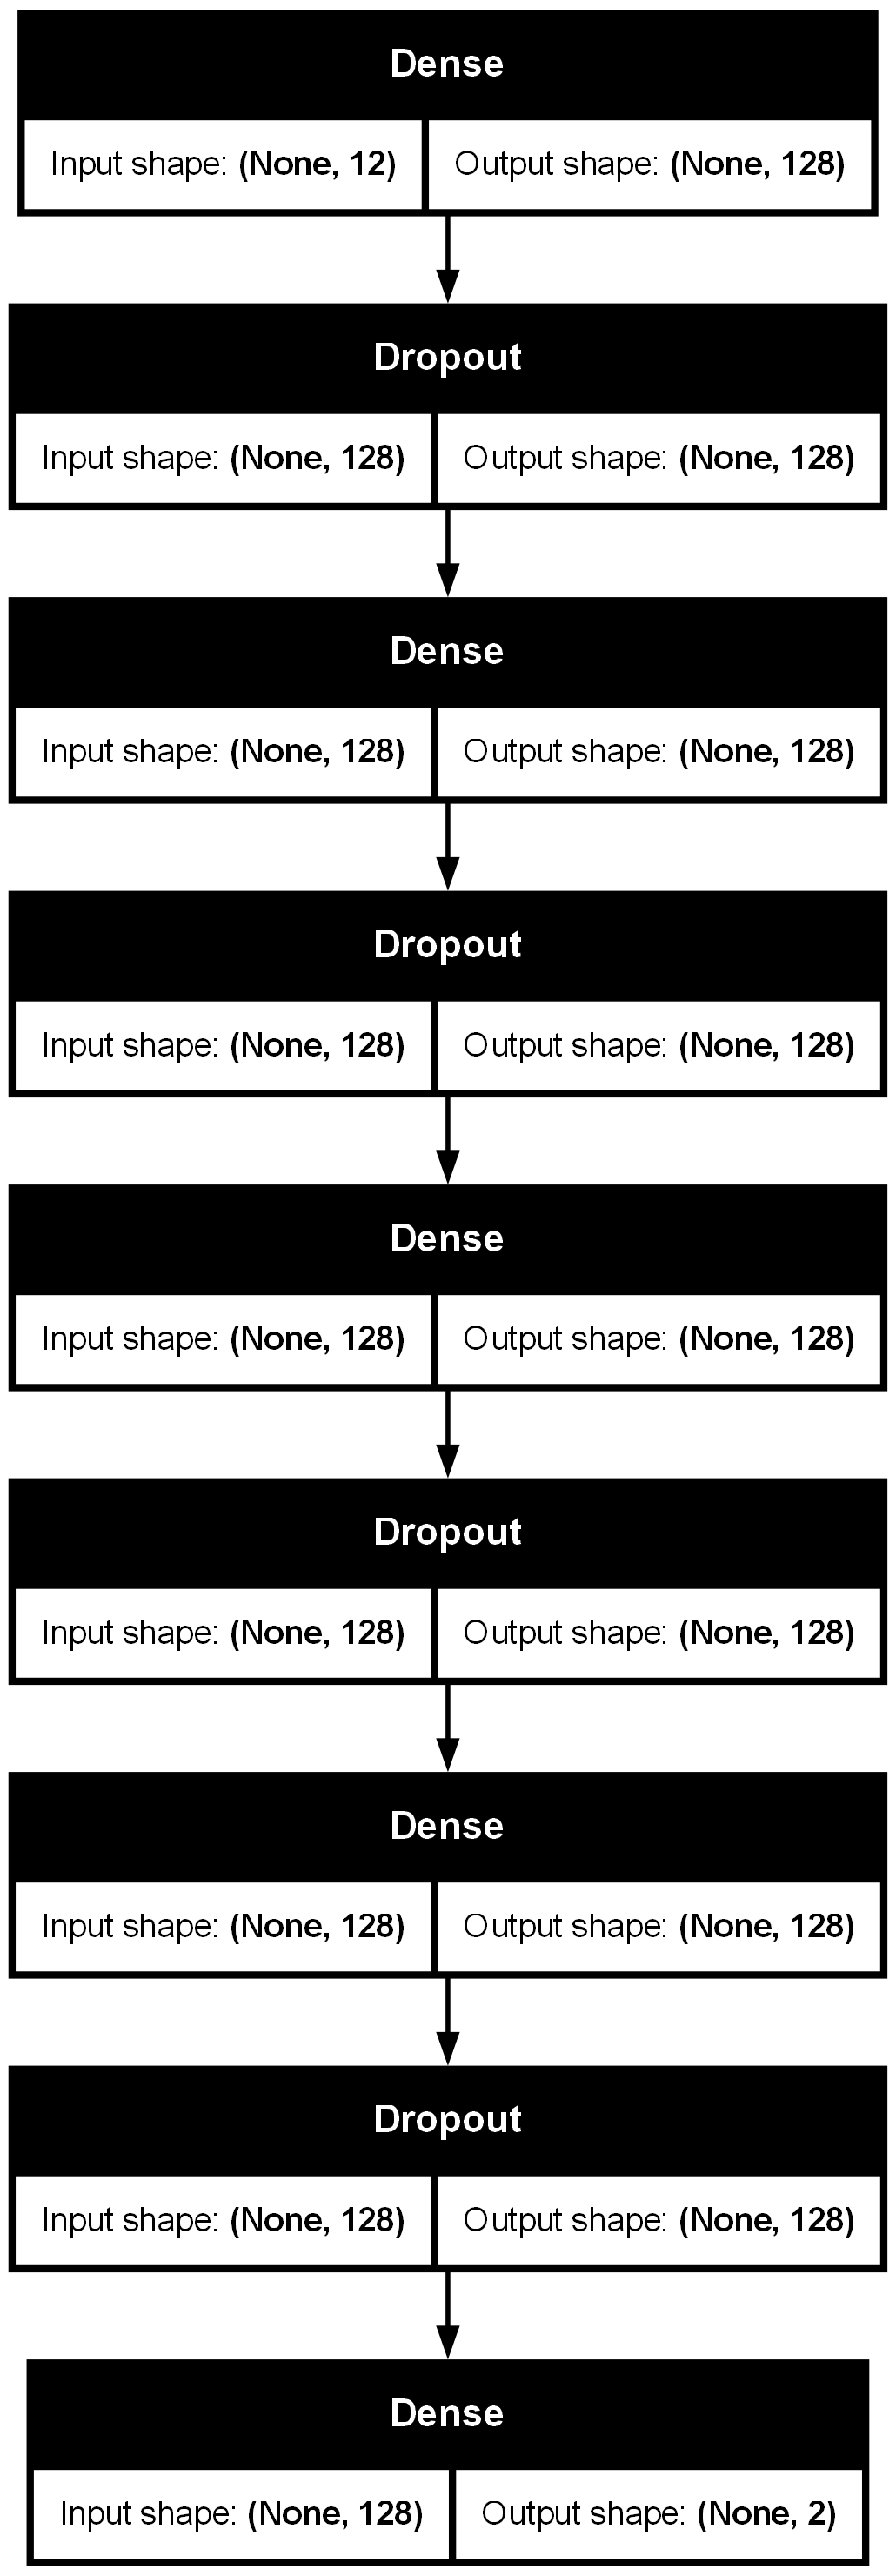

In [40]:
plot_model(loaded_model, to_file=r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(06) Fahrraddaten_Hyperparameter_Tuning2\loaded_model_architecture.png", show_shapes=True)

In [41]:
with open(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(06) Fahrraddaten_Hyperparameter_Tuning2\loaded_model_summary.txt", 'w') as f:
    loaded_model.summary(print_fn=lambda x: f.write(x + '\n'))